# Homework Assignment 1

## Data analysis

In this assignment, one must:

1. Describe your data and their features.

2. Perform an unconditional mono-variate analysis.

3. Perform a class-conditional mono-variate analysis.

4. Perform an unconditional bi-variate analysis of the predictors.

5. Perform an unconditional multi-variate analysis of the predictors.

## Importing packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
import numpy as np


In [2]:
pd.options.display.max_columns = None

sns.set_theme(style='darkgrid')
sns.set_palette("twilight_shifted")

## Reading Database

In [3]:
data = pd.read_csv("../../data/external/Agregado-20241114133303.csv", 
                   encoding="latin-1",
                   sep=";")

print(data.shape)
data.head()

(659, 229)


,Código do Município,Município,Estado,Ano de Referência,Código do Prestador,Prestador,Sigla do Prestador,Abrangência,Tipo de Serviço,Natureza Jurídica,G05A - Quantidade total de municípios atendidos com abastecimento de água,G05B - Quantidade total de municípios atendidos com esgotamento sanitário,G06A - População urbana residente do(s) município(s) com abastecimento de água,G06B - População urbana residente do(s) município(s) com esgotamento sanitário,"G12A - População total residente do(s) município(s) com abastecimento de água, segundo o IBGE","G12B - População total residente do(s) município(s) com esgotamento sanitário, segundo o IBGE",GE001 - Quantidade de municípios atendidos com abastecimento de água com delegação em vigor,GE002 - Quantidade de municípios atendidos com abastecimento de água com delegação vencida,GE003 - Quantidade de municípios atendidos com abastecimento de água sem delegação,GE005 - Quantidade total de municípios atendidos,GE008 - Quantidade de Sedes municipais atendidas com abastecimento de água,GE009 - Quantidade de Sedes municipais atendidas com esgotamento sanitário,GE010 - Quantidade de Localidades (excluídas as sedes) atendidas com abastecimento de água,GE011 - Quantidade de Localidades (excluídas as sedes) atendidas com esgotamento sanitário,GE014 - Quantidade de municípios atendidos com esgotamento sanitário com delegação em vigor,GE015 - Quantidade de municípios atendidos com esgotamento sanitário com delegação vencida,GE016 - Quantidade de municípios atendidos com esgotamento sanitário sem delegação,GE017 - Ano de vencimento da delegação de abastecimento de água,GE018 - Ano de vencimento da delegação de esgotamento sanitário,"GE025 - Quantidade de municípios não atendidos com abastecimento de água, mas com delegação em vigor","GE026 - Quantidade de municípios não atendidos com abastecimento de água, mas com delegação vencida para prestar esses serviços","GE028 - Quantidade de municípios não atendidos com esgotamento sanitário, mas com delegação em vigor para prestar esses serviços","GE029 - Quantidade de municípios não atendidos com esgotamento sanitário, mas com delegação vencida para prestar esses serviços",AG001 - População total atendida com abastecimento de água,AG001A - População total atendida com abastecimento de água no ano anterior ao de referência.,AG002 - Quantidade de ligações ativas de água,AG002A - Quantidade de ligações ativas de água no ano anterior ao de referência.,AG003 - Quantidade de economias ativas de água,AG003A - Quantidade de economias ativas de água no ano anterior ao de referência.,AG004 - Quantidade de ligações ativas de água micromedidas,AG004A - Quantidade de ligações ativas de água micromedidas no ano anterior ao de referência.,AG005 - Extensão da rede de água,AG005A - Extensão da rede de água no ano anterior ao de referência.,AG006 - Volume de água produzido,AG007 - Volume de água tratada em ETAs,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,AG011 - Volume de água faturado,AG012 - Volume de água macromedido,AG013 - Quantidade de economias residenciais ativas de água,AG013A - Quantidade de economias residenciais ativas de água no ano anterior ao de referência.,AG014 - Quantidade de economias ativas de água micromedidas,AG014A - Quantidade de economias ativas de água micromedidas no ano anterior ao de referência.,AG015 - Volume de água tratada por simples desinfecção,AG016 - Volume de água bruta importado,AG017 - Volume de água bruta exportado,AG018 - Volume de água tratada importado,AG019 - Volume de água tratada exportado,AG020 - Volume micromedido nas economias residenciais ativas de água,AG021 - Quantidade de ligações totais de água,AG021A - Quantidade de ligações totais de água no ano anterior ao de referência.,AG022 - Quantidade de economias residenciais ativas de água micromedidas,AG022A - Quantidade de economias residenciais ativas de água micromedidas no ano anterior ao de referência.,AG024 - Volume de serviço,AG025A - População

In [4]:
# selected_cols = ["Município", "Ano de Referência", "Sigla do Prestador", 
#                  "Abrangência", "Tipo de Serviço", "Natureza Jurídica",
#                  "IN022 - Consumo médio percapita de água", "IN023 - Índice de atendimento urbano de água", 
#                  "IN055 - Índice de atendimento total de água", 
#                  "G12A - População total residente do(s) município(s) com abastecimento de água, segundo o IBGE"]

dim_municipio = data[["Código do Município", "Município"]].drop_duplicates()
dim_prestadores = data[["Código do Prestador", "Prestador", "Sigla do Prestador"]].drop_duplicates()

In [5]:
columns_new_names = {
    'Município': 'nm_municipio',
    # 'Ano de Referência': 'ano',
    # 'Sigla do Prestador': 'sg_prestador',
    'Abrangência': 'abrangencia',
    'Tipo de Serviço': 'tipo_servico',
    'Natureza Jurídica': 'nat_juridica',
    'IN022 - Consumo médio percapita de água': 'IN022',
    'IN023 - Índice de atendimento urbano de água': 'IN023',
    'IN037 - Participação da despesa com energia elétrica nas despesas de exploração': 'IN037',
    'IN038 - Participação da despesa com produtos químicos nas despesas de exploração (DEX)': 'IN038',
    'IN055 - Índice de atendimento total de água': 'IN055',
    'G12A - População total residente do(s) município(s) com abastecimento de água, segundo o IBGE': 'G12A'
}

selected_cols = columns_new_names.keys()
numerical_columns = ['IN023', 'IN037', 'IN038', 'IN055', 'G12A']
categorical_columns = ['tipo_servico']
target_col = 'consumption_bands'

In [6]:
def get_consumption_bands(in022: float):
    if np.isnan(in022):
        return np.nan
    elif in022 <= 50:
        return "Critic low"
    elif in022 > 50 and in022 <= 100:
        return "Low"
    elif in022 > 100 and in022 <= 150:
        return "Moderate"
    elif in022 > 150 and in022 <= 200:
        return "Moderate to High"
    else:
        return "Very High"



In [7]:
columns_transformations = {
        # "ano": int,
        "IN022": lambda x: x.str.replace(",", ".").astype(float), 
        "IN023": lambda x: x.str.replace(",", ".").astype(float), 
        "IN037": lambda x: x.str.replace(",", ".").astype(float), 
        "IN038": lambda x: x.str.replace(",", ".").astype(float), 
        "IN055": lambda x: x.str.replace(",", ".").astype(float), 
        "G12A": lambda x: x.str.replace(".", "").astype(float)
    }

In [8]:
df = (data[selected_cols]
      # .query("`Ano de Referência` != '---'")
      .rename(columns=columns_new_names))

df["tipo_servico"] = df["tipo_servico"].str.rstrip()
df[list(columns_transformations.keys())] = df.agg(columns_transformations)

df[target_col] = df["IN022"].apply(get_consumption_bands)

df = (df[df["consumption_bands"].notna()]
      .drop(columns=["IN022"]))
           


/tmp/ipykernel_32415/583162864.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  "G12A": lambda x: x.str.replace(".", "").astype(float)


##  1 Describe your data and their features
1 Describe your data and their features in terms of number of observations $N$, number of predictor variables $D$, number of classes $L$ and class-distribution (that is, the number of observations for each of the classes).

In [9]:
# number of observations
n_observations = len(df)
print("Number of observations (N):", n_observations)

Number of observations (N): 511


In [10]:
n_variables = len(numerical_columns)
print("Number of predictor variables (D):", n_variables)

Number of predictor variables (D): 5


In [11]:
n_cat_var = len(categorical_columns)
print("Number of categorical variables (N_cat):", n_cat_var)

Number of categorical variables (N_cat): 1


In [12]:
n_classes = len(df[target_col].unique())
print("Number of classes (L):", n_classes)

Number of classes (L): 5


In [13]:
def describe_class(df: pd.DataFrame, col_name: str, col_description: str) -> None:
    L = len(df[col_name].unique())
    description_str = "\n".join(
        [
            f"\nThe column '{col_description}' has {L} categories",
            f"Observations per category:\n{df[col_name].value_counts()}"
        ])
    
    return description_str


In [14]:
# Class distribution

print("#"*80)
s = f" Class-distribution for the features "
print(f"{s:#^80}")
print("#"*80)

for desc, col_name in columns_new_names.items():
    if col_name in categorical_columns:
        print(describe_class(df, col_name, desc))

################################################################################
##################### Class-distribution for the features ######################
################################################################################

The column 'Tipo de Serviço' has 2 categories
Observations per category:
Água e Esgoto    300
Água             211
Name: tipo_servico, dtype: int64


In [15]:
print("#"*80)
s = f" Class-distribution for the Variable of interest | {target_col} "
print(f"{s:#^80}")
print("#"*80)
print(describe_class(df, target_col, 'Faixas de consumos de água por habitante - IN022'))

################################################################################
##### Class-distribution for the Variable of interest | consumption_bands ######
################################################################################

The column 'Faixas de consumos de água por habitante - IN022' has 5 categories
Observations per category:
Moderate            236
Low                 158
Very High            55
Moderate to High     51
Critic low           11
Name: consumption_bands, dtype: int64


## 2. Perform an unconditional mono-variate analysis.

Perform an unconditional mono-variate analysis of each of the $D$ predictors. Specifically, you must plot their (unconditional) histograms and box-plots, calculate their (unconditional) mean $\mu_d$, standard deviation $\sigma_d$ and skewness $\gamma_d$, with $d = 1,...,D$ using all the N observations.

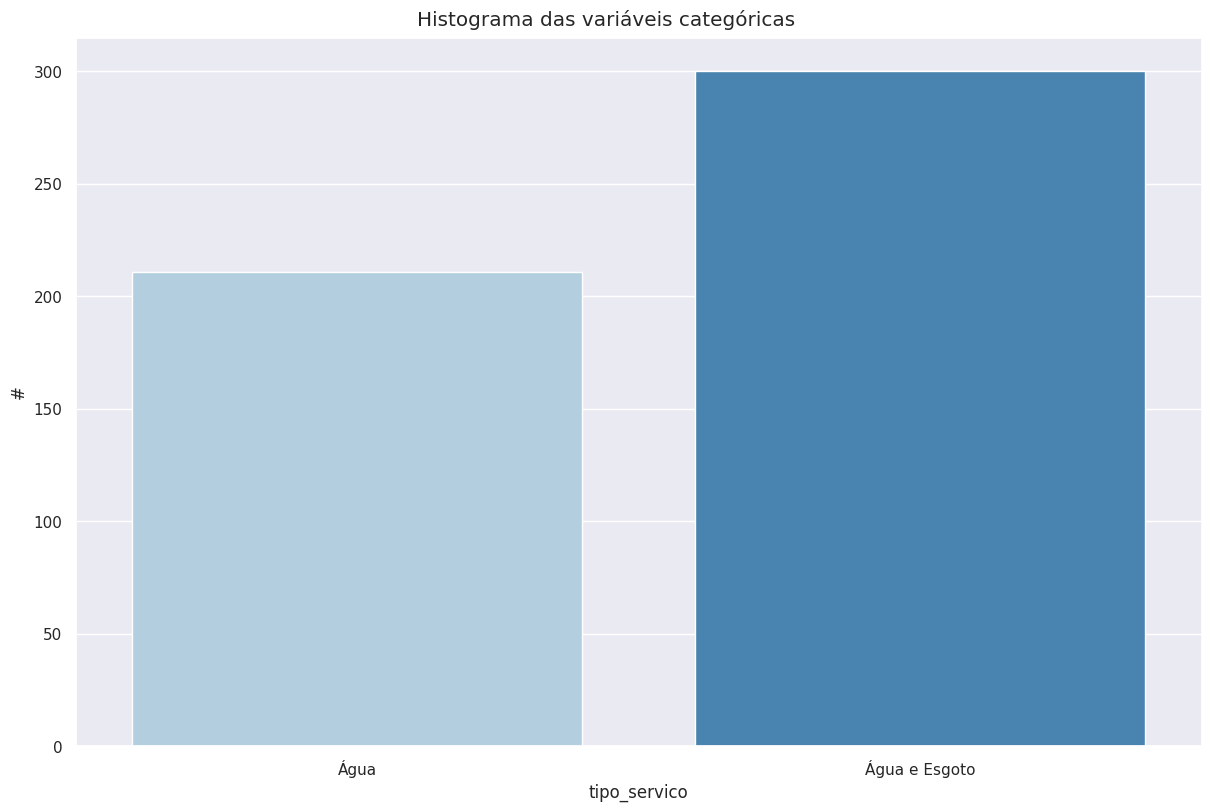

In [16]:

fig, axs = plt.subplots(1, 1, figsize=(12,8), dpi=100, constrained_layout = True)
rotations = [0, 0, 10]
has = ['center']
for ax, col, rotation, ha in zip([axs], categorical_columns, rotations, has):
    sns.countplot(df, x=col, ax=ax, palette="Blues")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha=ha)
    ax.set_ylabel("#")

plt.suptitle("Histograma das variáveis categóricas")
plt = plt

In [17]:
numerical_columns

['IN023', 'IN037', 'IN038', 'IN055', 'G12A']

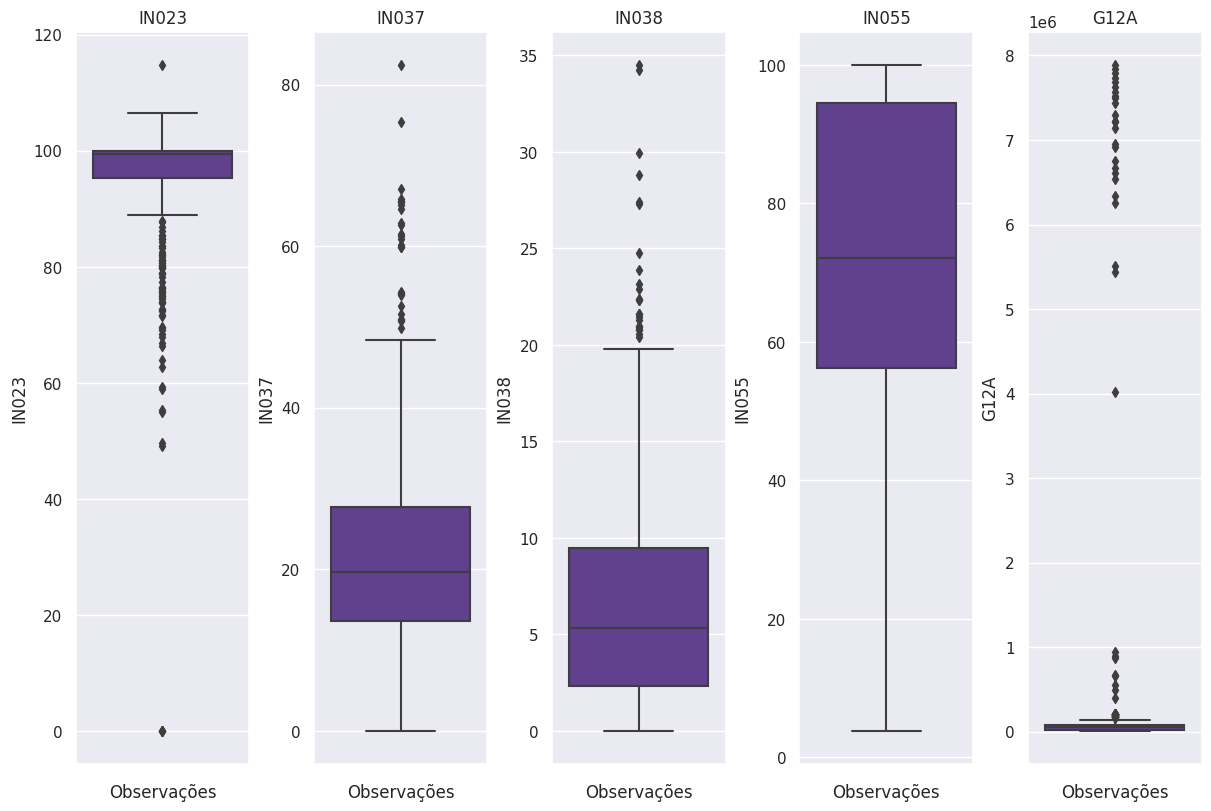

In [18]:
fig, axs = plt.subplots(1, len(numerical_columns), figsize=(12,8), dpi=100, constrained_layout = True)
# axs = axs.flatten()
# i=0
# plt.suptitle("Histograma das variáveis numéricas")
for ax, col in zip(axs.flatten(), numerical_columns):
    sns.boxplot(
        y=df[col],
        ax=ax
    )

    ax.set(title=f"{col}")
    ax.set_xlabel("Observações", fontsize=12)
    ax.set_ylabel(col, fontsize=12)


In [19]:
df.describe().loc[["count", "mean", "std"]]

,IN023,IN037,IN038,IN055,G12A
count,468.000000,509.000000,509.000000,490.000000,5.080000e+02
mean,94.516303,22.153792,6.752417,72.607163,4.019673e+05
std,12.595402,13.276675,5.870020,21.802571,1.504425e+06


$$\gamma_d = \frac{\sum_{i=1}^N (X_i - \overline{X})^3}{(N-1)* \sigma^3}$$

In [20]:
def skewness(df, col):
    N = len(df[col].dropna())
    x_hat = df[col].dropna().mean()
    std = df[col].dropna().std()

    skew = df[col].apply(lambda x: (x-x_hat)**3).sum()/((N-1)*std**3)

    return skew

def skew(X):
    _X = X[~np.isnan(X)]
    N = len(_X)
    x_hat = np.mean(_X)
    std = np.std(_X)

    skew = np.sum(np.fromiter(((x-x_hat)**3 for x in _X), float))/((N-1)*std**3)

    return skew   

In [21]:
s_size = 20
for col in numerical_columns:
    _str = f"{col}: {skew(df[col]):.6f}"
    print(_str)


IN023: -4.434904
IN037: 1.348394
IN038: 1.551765
IN055: -0.407945
G12A: 4.254050


In [22]:
# Pandas built-in method
df.skew(numeric_only=True)

IN023   -4.439670
IN037    1.349726
IN038    1.553298
IN055   -0.408364
G12A     4.258260
dtype: float64

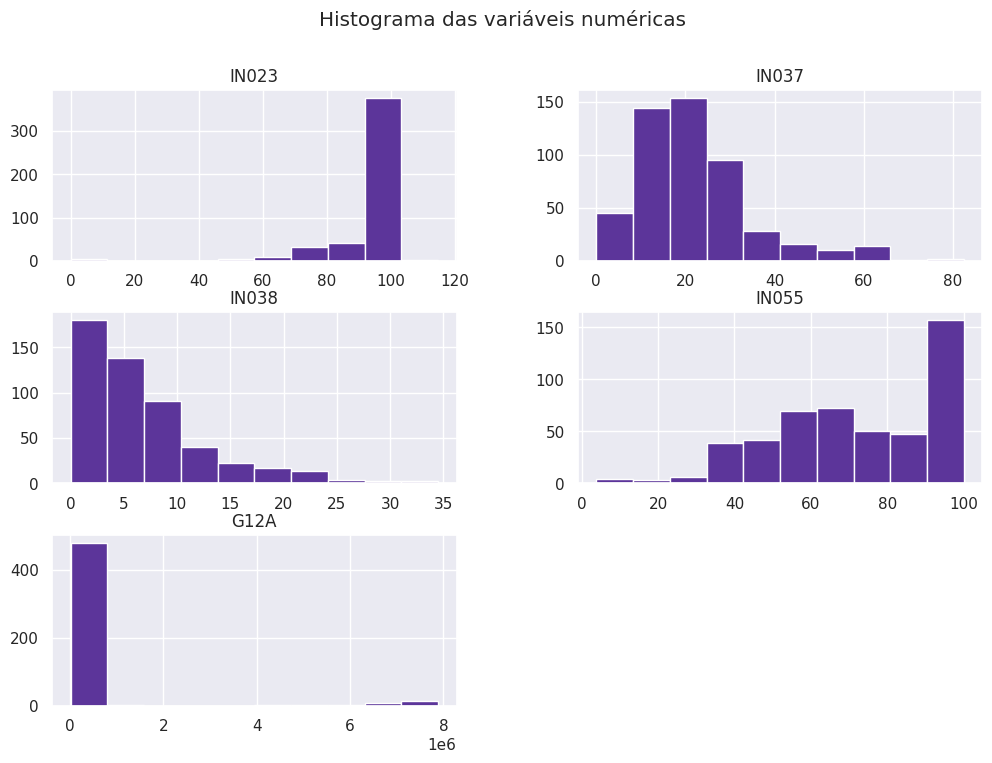

In [23]:
df.hist(figsize=(12,8))
plt.suptitle("Histograma das variáveis numéricas")
plt = plt

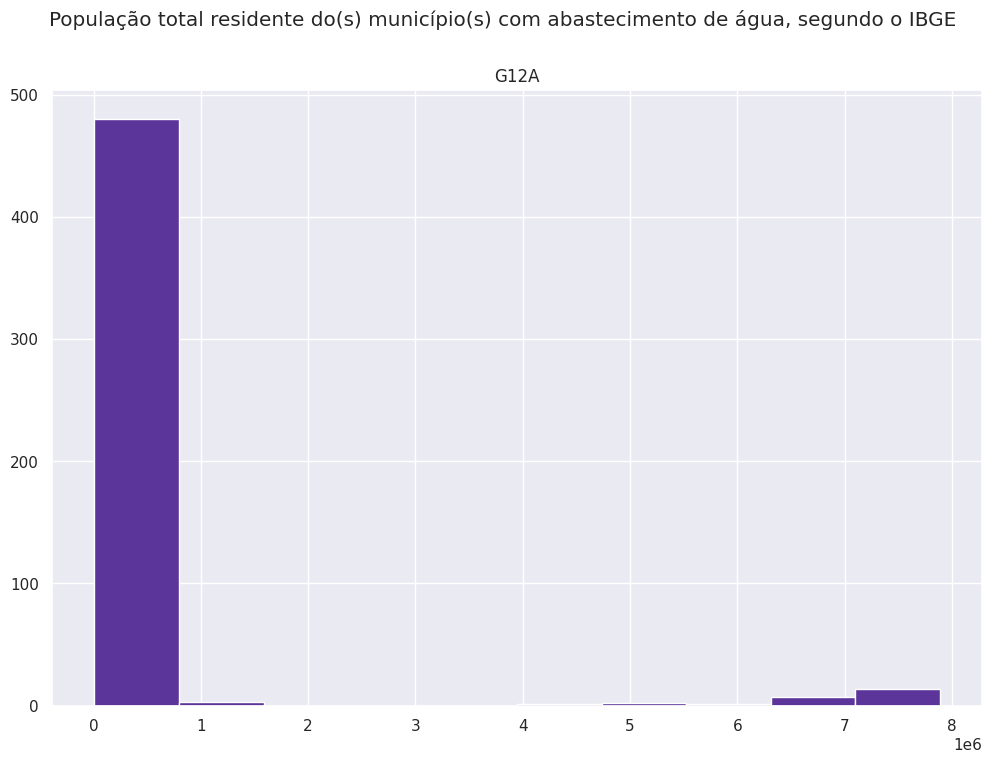

In [24]:
# Visualizing the histogram of column G12A with higher definition
df[["G12A"]].hist(figsize=(12,8))
plt.suptitle("População total residente do(s) município(s) com abastecimento de água, segundo o IBGE")

plt = plt

## 3. Perform a class-conditional mono-variate analysis.
Perform a class-conditional mono-variate analysis of each of the predictors. Again, you must plot their (class-conditional) histograms and box-plots, calculate their (class-conditional) mean $\mu_{d|l}$, standard deviation $\sigma_{d|l}$ and skewness $\gamma_{d|l}$ , with $d = 1,..., D$, now using only the $N_l$ observations of class $l$, for each the $L$ classes.

In [25]:
def class_conditional_analysis(df: pd.DataFrame, col_name: str, category: str) -> None:
    _df = df.query(f"{col_name} == '{category}'")

    print("#"*80)
    s = f" Conditional mono-variate analysis | {col_name} = {category} "
    print(f"{s:#^80}")
    print("#"*80, "\n")
    description = _df.describe().loc[["count", "mean", "std"]]
    s = " Descriptive Statistic "
    print(f"{s:#^80}")
    print(description, "\n")
    
    skew = _df.skew(numeric_only=True)
    s = " Skewnes "
    print(f"{s:#^80}")
    print(skew, "\n")


    _df.hist(figsize=(12,8))
    plt.suptitle(f"Class-conditional histogram | {col_name} = {category}")



In [26]:

df.groupby("consumption_bands").agg({
    "IN023": ("count", np.mean, np.std, skew),
    "IN037": ("count", np.mean, np.std, skew),
    "IN038": ("count", np.mean, np.std, skew),
    "IN055": ("count", np.mean, np.std, skew),
    "G12A": ("count", np.mean, np.std, skew)
    })

IN023                                 IN037             \
                  count       mean        std      skew count       mean   
consumption_bands                                                          
Critic low           10  81.958000  15.464063 -0.334538    10  23.056000   
Low                 137  96.067883  11.013752 -5.800899   157  22.622038   
Moderate            222  93.627973  13.250158 -3.942393   236  21.007034   
Moderate to High     50  95.800400   8.765210 -3.035934    51  21.862353   
Very High            49  95.455510  14.905804 -5.712368    55  25.844000   

                                       IN038                                \
                         std      skew count      mean       std      skew   
consumption_bands                                                            
Critic low         16.647797  0.841338    10  5.191000  5.374879  1.678646   
Low                15.757617  1.308464   157  8.376369  6.861970  1.393142   
Moderate           10.280467  1.378523   236  6.211229  4.744010  1.414535   
Moderate to High   11.067409  1.220153    51  6.536078  5.748331  1.547754   
Very High          17.346366  0.710305    55  4.923455  6.474741  1.762852   

                  IN055                                  G12A                 \
                  count       mean        std      skew count           mean   
consumption_bands                                                              
Critic low           10  56.764000  18.912775 -0.061941    11   86767.636364   
Low                 156  68.600641  21.836502 -0.512218   158   70372.025316   
Moderate            221  74.222851  21.010288 -0.346181   233  769663.605150   
Moderate to High     48  78.127917  18.333300 -0.486553    51  204158.352941   
Very High            55  75.541455  25.414693 -0.417094    55   43317.836364   

                                           
                            std      skew  
consumption_bands                          
Critic low         1.396276e+05  2.838038  
Low                1.458606e+05  4.767743  
Moderate           2.116099e+06  2.701225  
Moderate to High   9.593874e+05  7.048049  
Very High          2.313424e+04  0.790797

In [27]:
bands = ['Critic low', 'Low', 'Moderate', 'Moderate to High', 'Very High']

In [28]:

def cat_class_conditional_plot(df, categorical_columns, col, category, plot_params=None):
    fig, axs = plt.subplots(1, 1, figsize=(12,8), dpi=100, constrained_layout = True)
    
    _df = df.query(f"{col}=='{category}'")
    
    if plot_params == None:
        rotations = [0] * len(categorical_columns)
        has = ["center"] * len(categorical_columns)
    else:
        rotations = plot_params["rotations"]
        has = plot_params["has"]

    for ax, _col, rotation, ha in zip([axs], categorical_columns, rotations, has):
        sns.countplot(_df, x=col, ax=ax, palette="Blues")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha=ha)
        ax.set_ylabel("#")

    plt.suptitle(f"Análise mono-variada condicional | consumption_bands  = {category}")
    fig = fig

In [29]:

def tipo_servico_conditional_plot(df, col, bands, colors):
    fig, axs = plt.subplots(2, 3, figsize=(12,8), dpi=100, constrained_layout = True)
    
    for category, ax in zip(bands, axs.flatten()):
        _df = df.query(f"{col}=='{category}'")
    
        sns.countplot(_df, x="tipo_servico", ax=ax, palette=colors)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha=ha)
        ax.set_ylabel("Nº de Observações")
        ax.set_xlabel("Tipo de Serviço")
        ax.set_title(f"{category}")
    plt.suptitle(f"Análise mono-variada condicional por faixa de consumo")
    fig = fig

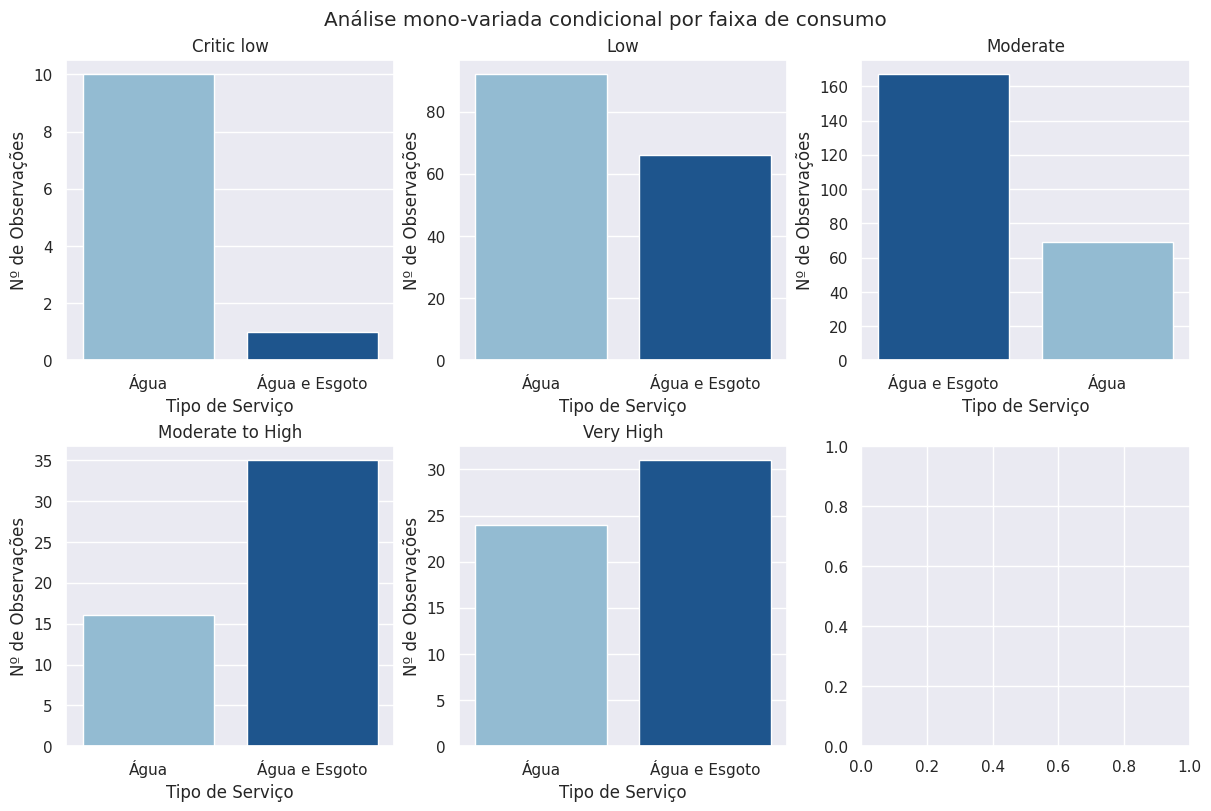

In [30]:
colors = {'Água': (0.5356862745098039, 0.746082276047674, 0.8642522106881968), 
          'Água e Esgoto': (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)}

col = "consumption_bands"
# category = bands[0]


tipo_servico_conditional_plot(df, col, bands, colors)

################################################################################
###### Conditional mono-variate analysis | consumption_bands = Critic low ######
################################################################################ 

############################ Descriptive Statistic #############################
           IN023      IN037      IN038      IN055           G12A
count  10.000000  10.000000  10.000000  10.000000      11.000000
mean   81.958000  23.056000   5.191000  56.764000   86767.636364
std    15.464063  16.647797   5.374879  18.912775  139627.618957 

################################### Skewnes ####################################
IN023   -0.357042
IN037    0.897933
IN038    1.791566
IN055   -0.066108
G12A     3.006626
dtype: float64 

################################################################################
######### Conditional mono-variate analysis | consumption_bands = Low ##########
##############################################################

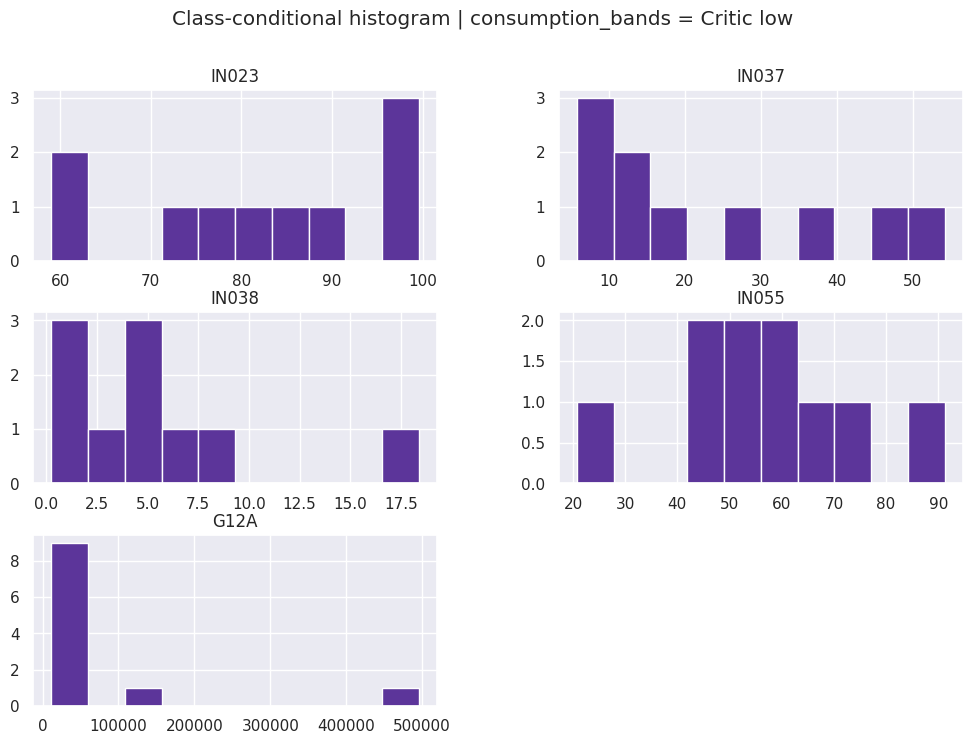

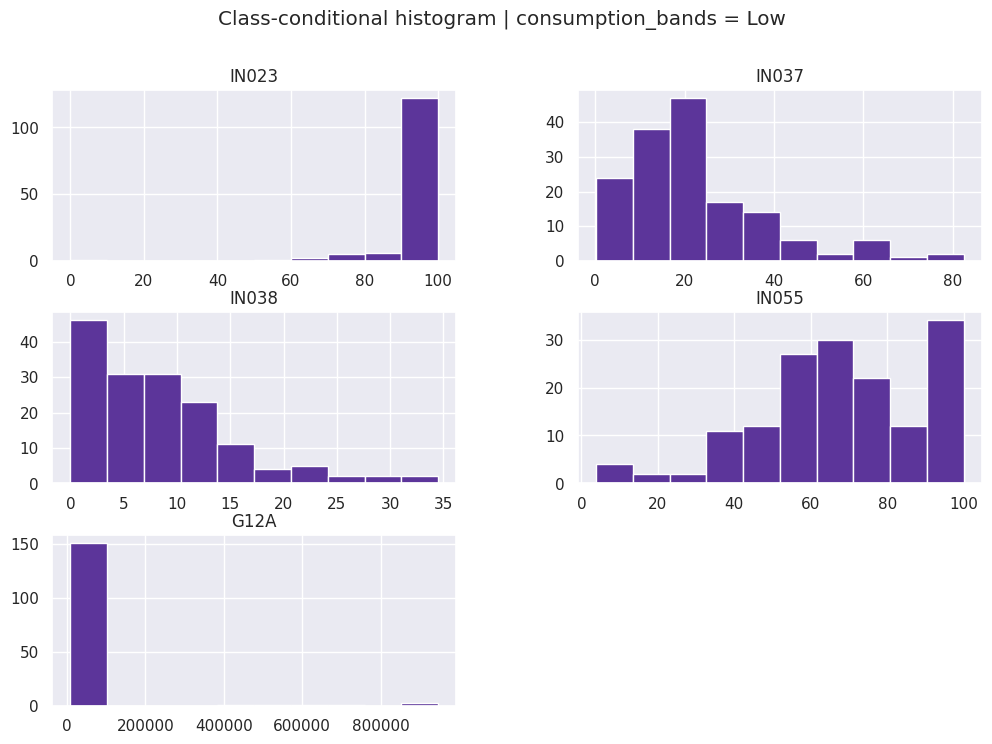

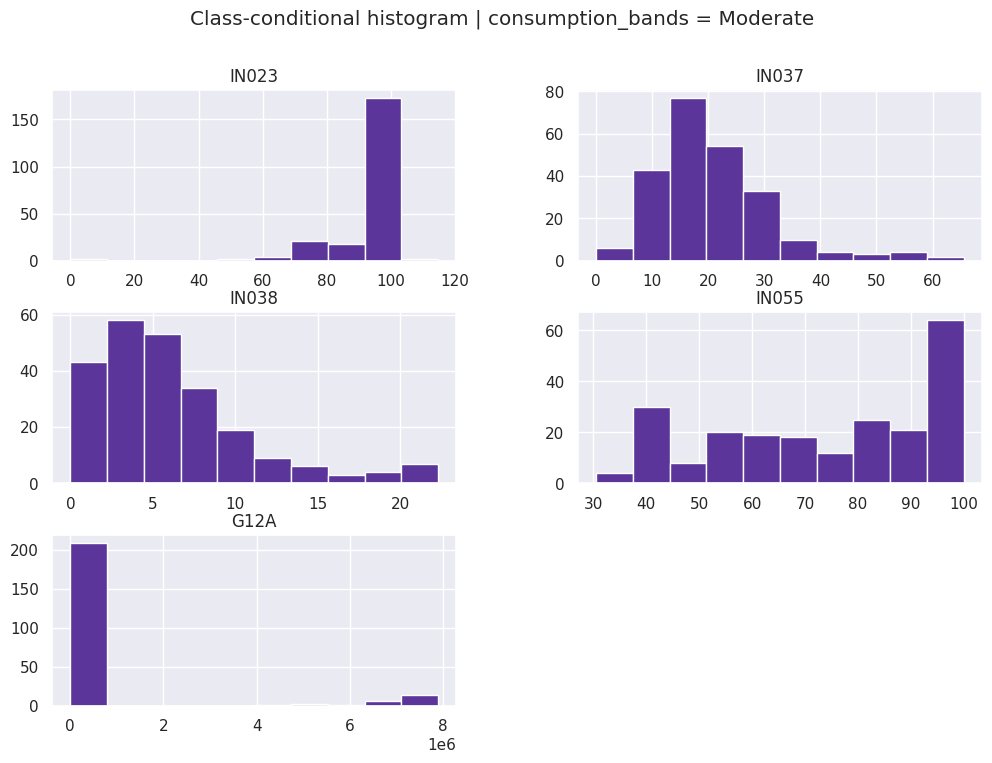

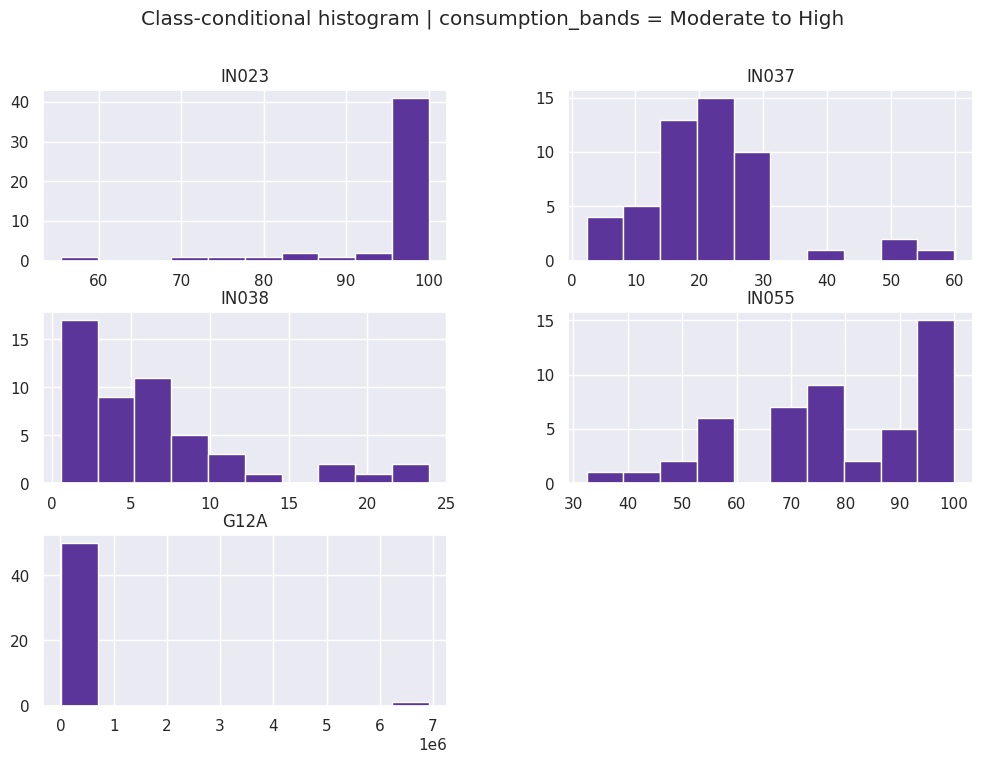

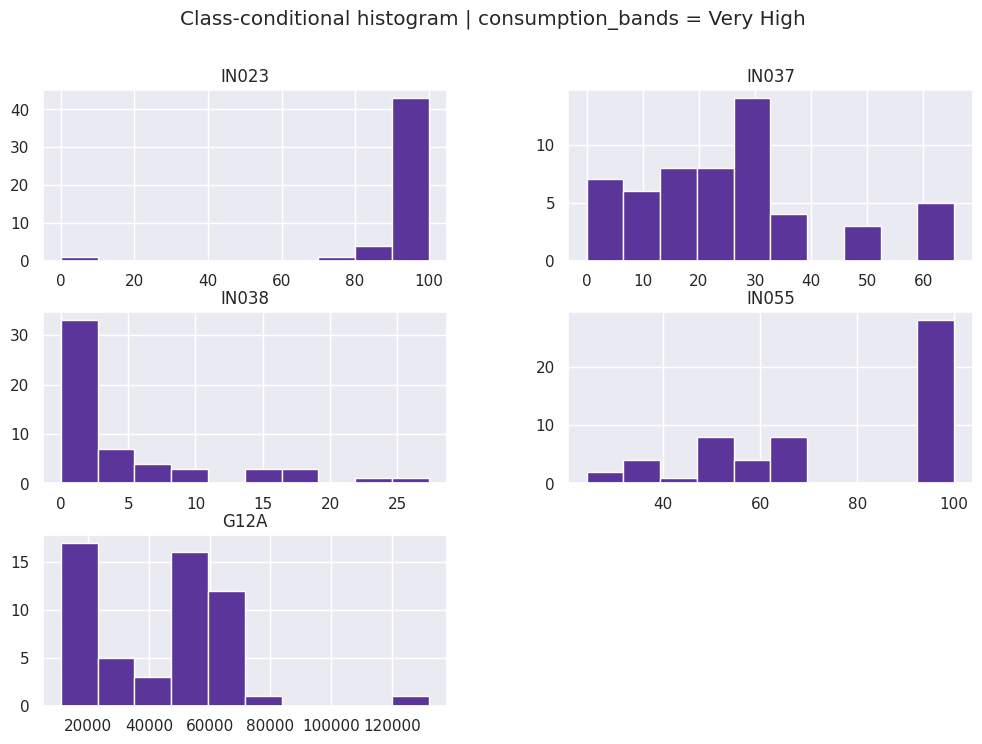

In [31]:
col = "consumption_bands"
for category in bands:
    class_conditional_analysis(df, col, category)

# 4. Perform an unconditional bi-variate analysis of the predictors.

Perform an unconditional bi-variate analysis of the predictors. Specifically, you must plot the scatter plots between all pairs of predictors. For each point (observation), use colours or symbols to indicate the associated class label. Investigate the existence of potential relationships between pairs of predictors and the presence of potential outliers.


In [32]:
from itertools import combinations

In [33]:
feature_combinations = list(combinations(numerical_columns, 2))
feature_combinations

[('IN023', 'IN037'),
 ('IN023', 'IN038'),
 ('IN023', 'IN055'),
 ('IN023', 'G12A'),
 ('IN037', 'IN038'),
 ('IN037', 'IN055'),
 ('IN037', 'G12A'),
 ('IN038', 'IN055'),
 ('IN038', 'G12A'),
 ('IN055', 'G12A')]

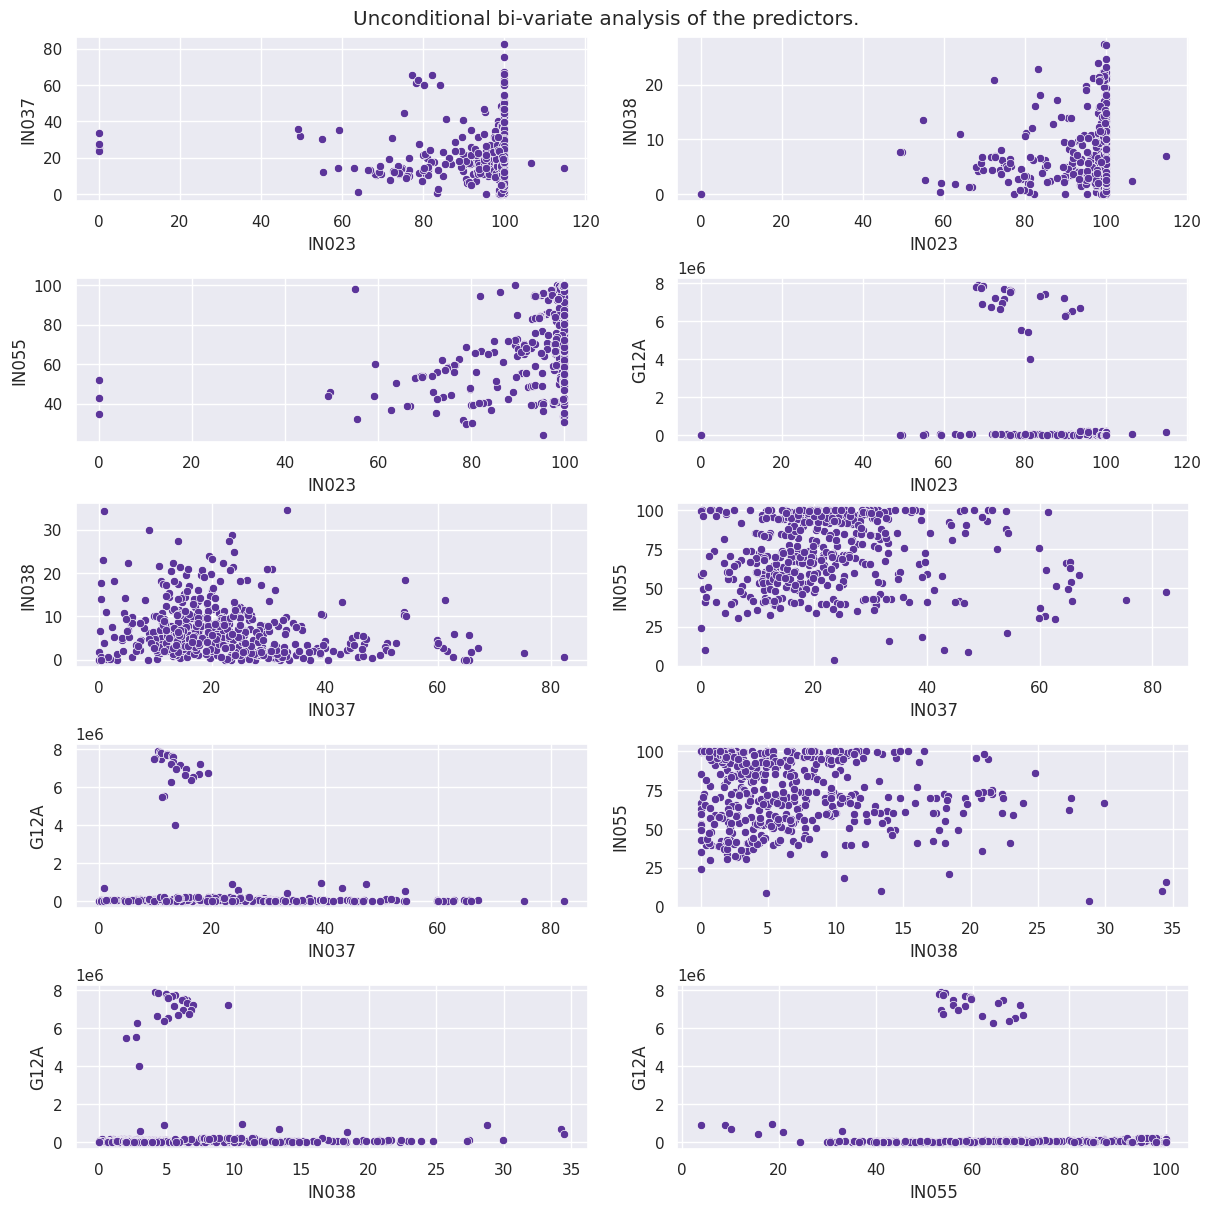

In [34]:
fig, axs = plt.subplots(5, 2, figsize=(12,12), dpi=100, constrained_layout = True)
# axs = axs.flatten()
# i=0
plt.suptitle("Unconditional bi-variate analysis of the predictors.")
for ax, (col1, col2) in zip(axs.flatten(), feature_combinations):
    sns.scatterplot(
        x=df[col1],
        y=df[col2],
        ax=ax
    )

    # ax.set(title=f"{col}")
    ax.set_xlabel(col1, fontsize=12)
    ax.set_ylabel(col2, fontsize=12)


In [35]:
matrix = df.corr(numeric_only=True)
matrix

,IN023,IN037,IN038,IN055,G12A
IN023,1.000000,0.021012,0.123122,0.379308,-0.304308
IN037,0.021012,1.000000,-0.201290,0.011490,-0.150042
IN038,0.123122,-0.201290,1.000000,-0.126660,-0.036545
IN055,0.379308,0.011490,-0.126660,1.000000,-0.136636
G12A,-0.304308,-0.150042,-0.036545,-0.136636,1.000000


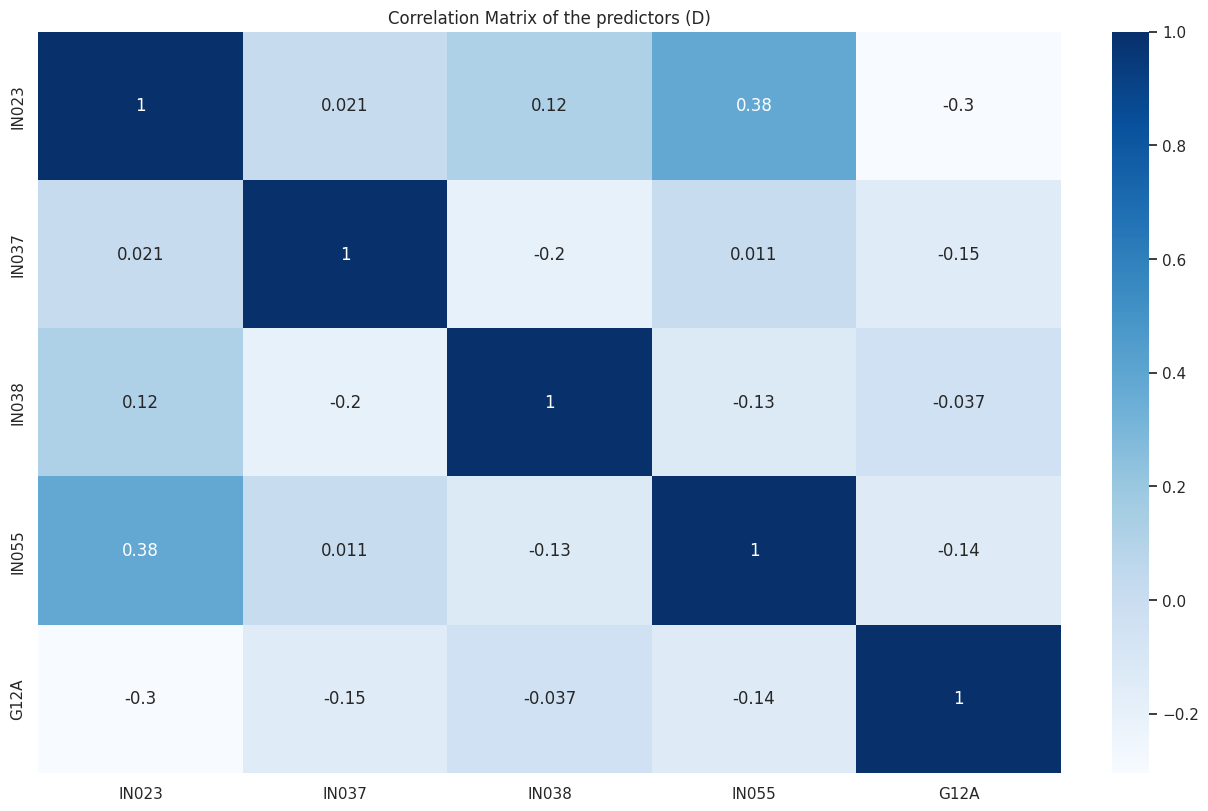

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(12,8), dpi=100, constrained_layout = True)

sns.heatmap(matrix, 
            cmap="Blues", 
            annot=True,
            ax=ax)

ax.set(title=f"Correlation Matrix of the predictors (D)")

ax = ax

# 5. Perform an unconditional multi-variate analysis of the predictors.

Perform an unconditional multi-variate analysis of the predictors. Specifically, you must perform a principal components analysis of the predictors, for the sake of visualisation, retain only the first two principal components (those associated with the two largest eigenvalues) and plot the scatter plot of the projected observations. Again, for each projected point (observation) you must use colours or symbols to indicate the associated class label. [Remember to perform the necessary preprocessing of the data]

In [37]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA

In [38]:
X = (df[categorical_columns + numerical_columns + ["consumption_bands"]].dropna()
     )

labels = X["consumption_bands"]

X.drop(columns=["consumption_bands"], inplace=True)

In [39]:
ohe = make_column_transformer(
  (MinMaxScaler(), numerical_columns),
  (OneHotEncoder(handle_unknown = 'ignore', sparse_output=False, dtype=float), categorical_columns),
  remainder='passthrough')

ohe.fit(X)
X_transformed = ohe.transform(X)

In [40]:
dummies_columns = [x.split("__")[1] for x in ohe.get_feature_names_out()]
dummies = pd.DataFrame(X_transformed, columns=dummies_columns)
X = dummies.astype({c: float for c in dummies_columns})

print(X.shape)
X.head()

(446, 7)


,IN023,IN037,IN038,IN055,G12A,tipo_servico_Água,tipo_servico_Água e Esgoto
0,1.0000,0.485804,0.098139,0.459142,0.001177,1.0,0.0
1,1.0000,0.233317,0.352426,0.449637,0.001165,1.0,0.0
2,0.9826,0.308784,0.054360,0.442640,0.001154,1.0,0.0
3,0.9881,0.000000,0.065669,0.446865,0.001141,1.0,0.0
4,0.9540,0.000000,0.000000,0.000000,0.001127,1.0,0.0


In [41]:
pca = PCA(n_components=X.shape[1])
pca_features  = pca.fit_transform(X)


In [42]:
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_in_
 
# Feature names before PCA
feature_names = X.columns

# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
feature_names,,,,,,,
IN023,-0.023186,-0.217660,0.117361,-0.187188,0.034498,-0.949781,-0.000000e+00
IN037,0.048608,-0.110900,-0.387370,-0.132853,0.903539,0.035365,2.439892e-15
IN038,0.047778,0.011087,0.913697,-0.028090,0.381352,0.128583,1.450536e-15
IN055,-0.100780,-0.928696,0.027964,0.315510,-0.056234,0.154519,4.155707e-17
G12A,-0.055820,0.267187,-0.011893,0.916171,0.174630,-0.235559,8.199606e-16


In [43]:
# Create DataFrame from PCA
pca_df = pd.DataFrame(
    data=pca_features[:, :2], 
    columns=['PC1', 'PC2'])
  
# Scale PCS into a DataFrame
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]
 
pca_df_scaled

,PC1,PC2
0,0.549983,0.055342
1,0.550523,0.092130
2,0.544401,0.090839
3,0.534684,0.117978
4,0.562298,0.509292
...,...,...
441,0.520894,-0.374796
442,0.518782,-0.375808
443,0.518634,-0.369020
444,0.517617,-0.370996


In [44]:
pca_df_scaled["consumption_bands"] = labels

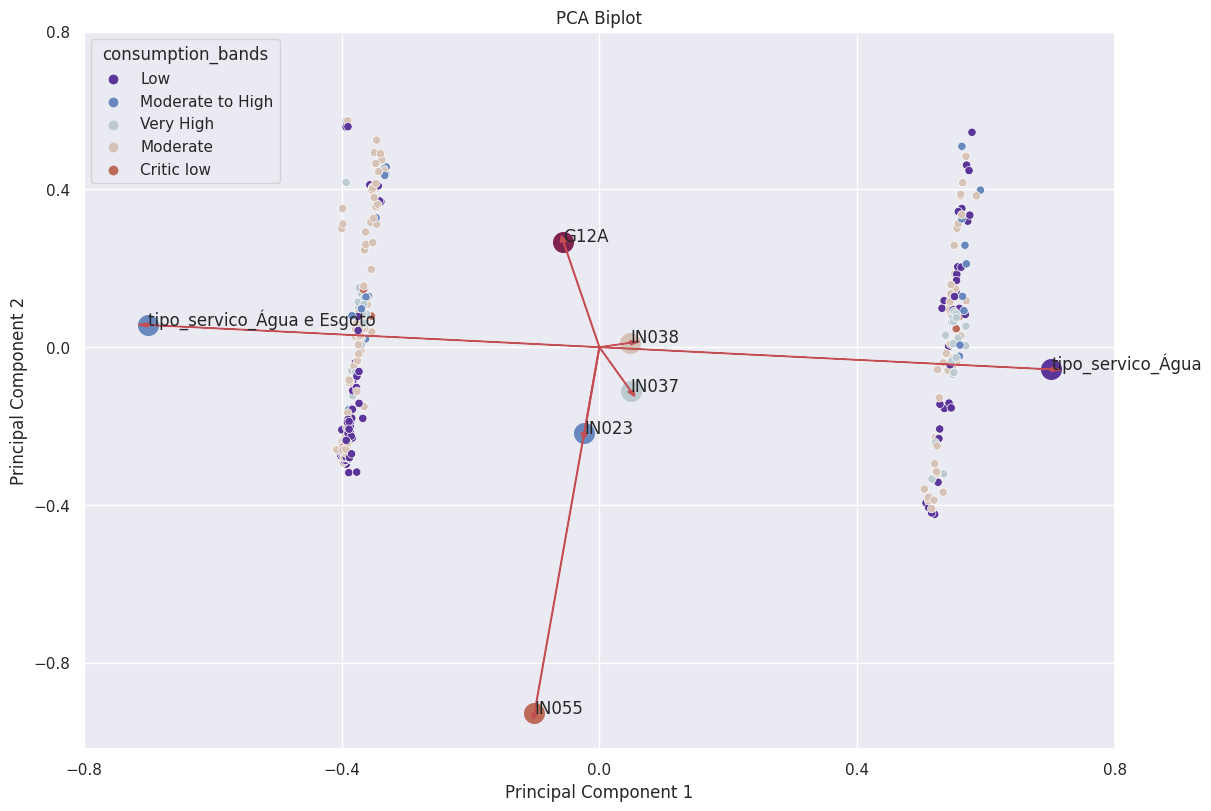

In [45]:
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]

fig, ax = plt.subplots(1, 1, figsize=(12,8), dpi=100, constrained_layout = True)

# plt.suptitle("")
sns.scatterplot(
    pca_df_scaled,
    x="PC1",
    y="PC2",
    ax=ax,
    hue="consumption_bands"
)
 
for i, varnames in enumerate(feature_names):
    ax.scatter(x=xs[i], y=ys[i], s=200)
    ax.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    ax.text(xs[i], ys[i], varnames)
 
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
 
ax.set_title('PCA Biplot')
fig = fig

Text(0, 0.5, 'Variância explicada cumulativa')

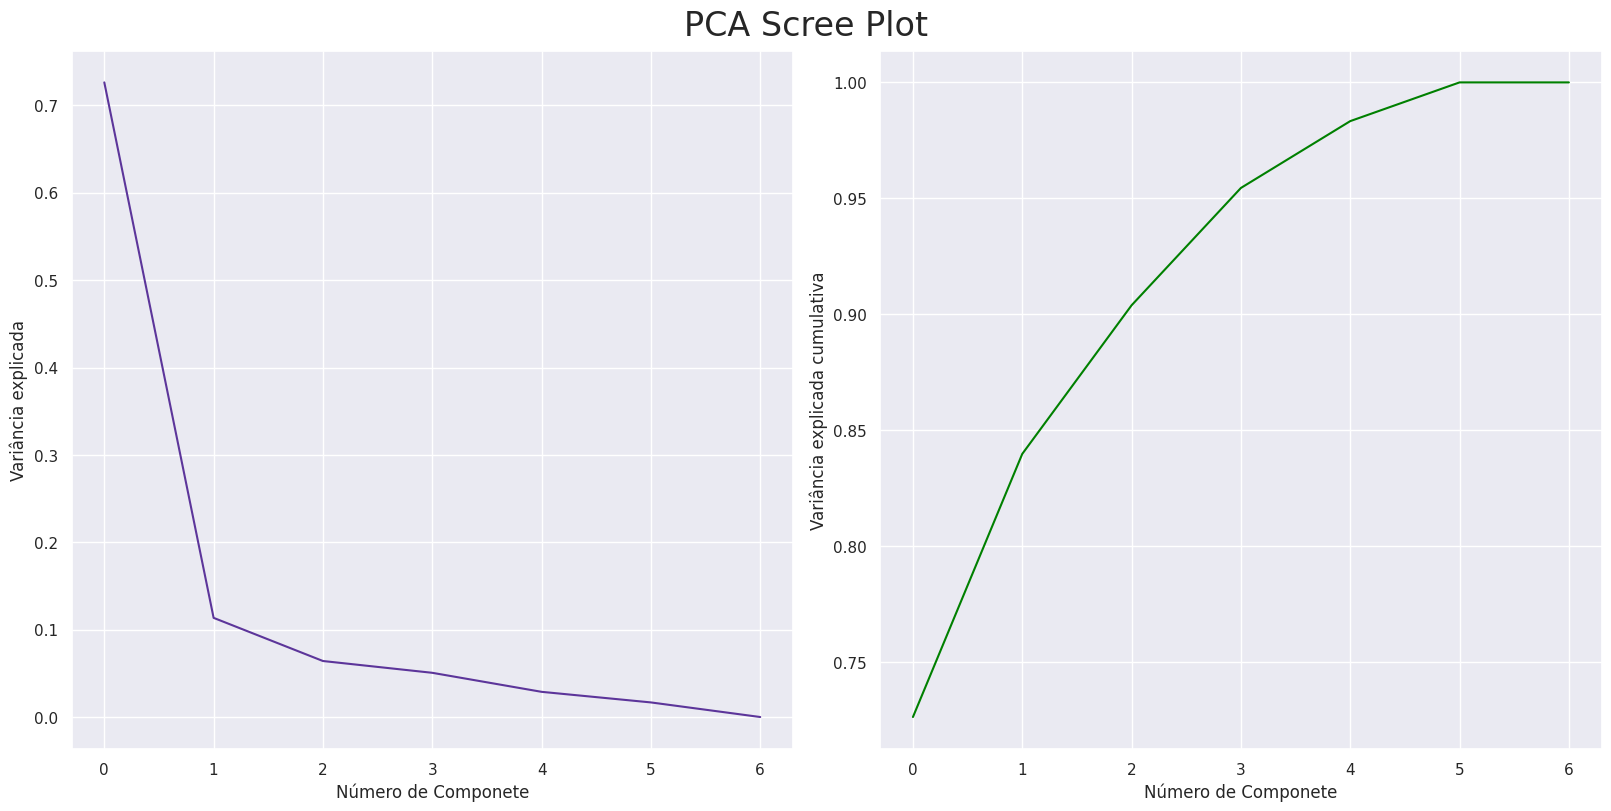

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8), dpi=100, constrained_layout = True)

plt.suptitle("PCA Scree Plot", fontsize=24)

sns.lineplot(pca.explained_variance_ratio_, ax=ax1)
ax1.set_xlabel('Número de Componete')
ax1.set_ylabel('Variância explicada')

sns.lineplot(np.cumsum(pca.explained_variance_ratio_), ax=ax2, color='green')
ax2.set_xlabel('Número de Componete')
ax2.set_ylabel('Variância explicada cumulativa')


In [47]:
# fig, ax = plt.subplots(1, 1, figsize=(12,8), dpi=100, constrained_layout = True)

# # plt.suptitle("")
# sns.scatterplot(
#     x=pca_features[:, 0],
#     y=pca_features[:, 1],
#     ax=ax
# )

# ax.set(title=f"Unconditional multi-variate analysis of the predictors | PCA")
# ax.set_xlabel("Component 1", fontsize=12)
# ax.set_ylabel("Component 2", fontsize=12)
# ax.set_title("", fontsize=15)


In [48]:
import sys